model.score() =
0.9770177617302775


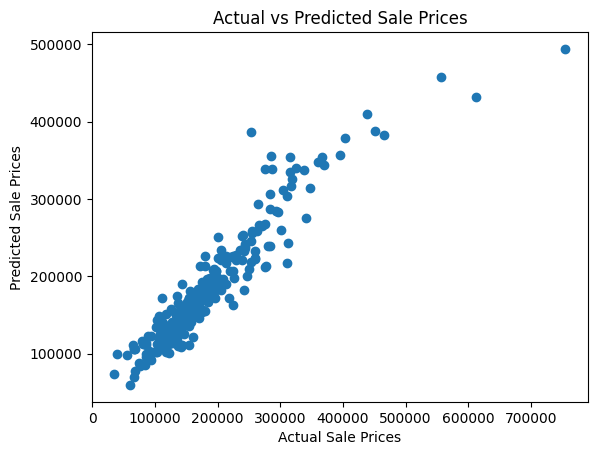

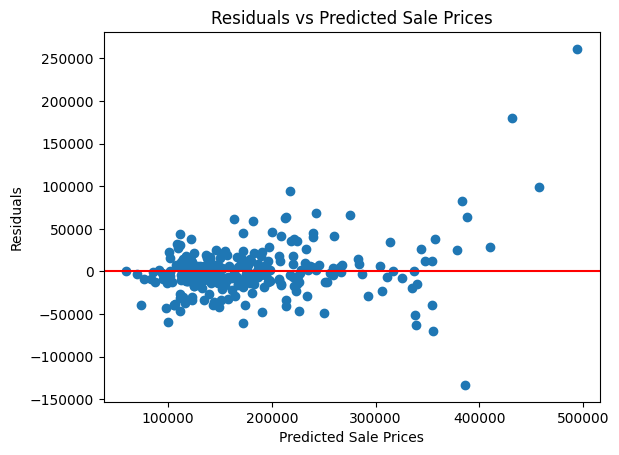

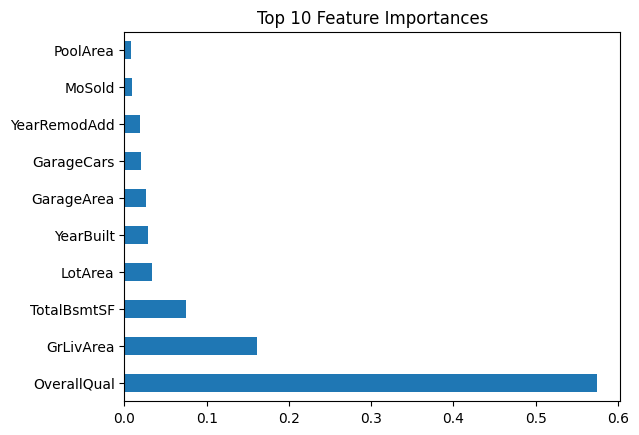

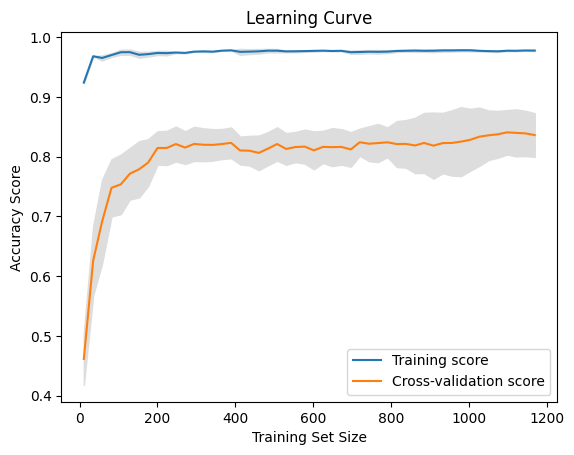

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("out.csv")

selected_features = [
    'YrSold', 'MoSold', 'mortgage_interest', 'inflation_rates',
    'OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF',
    'GarageCars', 'GarageArea', 'Neighborhood', 'YearBuilt',
    'YearRemodAdd', 'SalePrice','Street','PoolArea','PoolQC','LotArea','Heating','CentralAir'
]
data = pd.get_dummies(df[selected_features])

# Splitting data into features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("model.score() =") 
print(model.score(X_train, y_train))

# Make predictions on the test set
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sale Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Prices')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, n_jobs=-1, cv=5, train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

